 ## **[코드 내용]**
 
 ### A. 의미연결망 분석 (SNA)
 
 
 ### B. 단어 임베딩 (W2V)
 
    
 ### C. 군집분석 
   

# 데이터 전처리_공통 



텍스트마이닝의 여러 분석기법을 적용하여 본격적으로 분석하기 전에 항상 데이터에 대한 사전 정제작업_자연어 처리를 수행한다.

In [7]:
# 필요한 라이브러리 탑재하기

import re
import json
import pandas as pd
import xlsxwriter
import numpy as np

### option A: 네이버 블로그 csv파일 불러올 때는 이하의 코드를 실행한 후 optionB (쇼핑후기) 코드는 건너뛰고 바로 공통 코드로 이동

In [8]:
blog_df = pd.read_csv('data/skm_blog.csv', encoding='utf-8-sig') # 네이버 블로그 csv파일 불러오기

In [9]:
blog_df = blog_df.sort_values(by='Post Date' ,ascending=True) # post Date를 기준으로 오름차순으로 정렬
blog_df['Post Date'] = [str(dates).replace('.0','') for dates in blog_df['Post Date']] # 분석을 위해서 날짜의 형식을 변경함. 

In [10]:
blog_df.head()

Title  \
292            [차트뉴스] SK매직, 식기세척기 시장 만년 1위   
521      동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...    
96           SK매직 무선청소기 VCL-D200 개봉기 및 사용기   
534         내돈주고 사서쓰는 유선진공청소기 SK매직 VCL-613   
274  소형가전(무선청소기... ZB3233B /SK매직 EON-30AMD   

                                                  Link  \
292  https://blog.naver.com/danawaelec?Redirect=Log...   
521  https://blog.naver.com/xmsxmsdl89?Redirect=Log...   
96   https://blog.naver.com/rock115?Redirect=Log&lo...   
534  https://blog.naver.com/sejungrha?Redirect=Log&...   
274  https://blog.naver.com/vision1301?Redirect=Log...   

                                           Description          Blogger Name  \
292  오죽하면 빨래건조기, 로봇 청소기와 함께 신의 물건인 ‘가전 3신기’로 꼽히겠는가....   다나와 쇼핑톡 - 비교하고 잘사자!   
521  동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기 렌탈해서 사용하고 있어요. 안...         튼튼이/개똥이 행복!!!   
96   SK매직 무선청소기 VCL-D200 지금까지 유선청소기만 써 오다, 첫 무선청소기 ...         초코주의 창의적인 즐거움   
534  아기가 생긴 뒤로 내 머리카락 치우기에 여념이 없다가 세컨청소기를 사야겠다 마음먹고...  블리, 블리 주니어와 함께하는 일상♥   
274  다른 청소기를 사용안해봐서 비교는 어렵지만, 먼지 잘 빨리고 핸드링도 좋아요 ㅋㅋㅋ...             100님의 블로그   

                          Blogger Link Post Date  \
292  https://blog.naver.com/danawaelec  20161202   
521  https://blog.naver.com/xmsxmsdl89  20161208   
96      https://blog.naver.com/rock115  20161220   
534   https://blog.naver.com/sejungrha  20161223   
274  https://blog.naver.com/vision1301  20170121   

                                         Post Contents  
292  \n\n어쩌면 지금이야말로 그 어느 때보다 이불 밖은 위험한 시기다. 매서운 추위에...  
521  \n\n \n \n \n \n동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기 ...  
96   \n\n\n\n\n\n\n\n\n제품을 리뷰 \n\n\n\n\n\n\n\n\n\n\...  
534  \n\n\n\n\n\n\n\n\n상품평: 생활\n\n\n\n\n\n\n\n\n\n\...  
274  \n\n \n​\n소형가전은 인터넷으로 구매하고 있어요\n \n청소기는 집이 좁은관...

In [11]:
# 문서에 'Post Date'에서 빈칸을 nan (빈데이터)를 찾아주고 삭제해주는 과정 = 나중에 분석에 오류를 없애기 위해서
drop_index = blog_df['Post Date'][blog_df['Post Date']=='nan'].index
d = [d for d in drop_index] 
print(d, '\n') # 아래 결과 예) 751 번째 행의 날짜가 nan으로 표시 되어있음을 알 수 있음. 

blog_df.drop(d, axis=0, inplace=True) # nan 데이터가 있는 행을 삭제해줌.
print(blog_df.shape)

[362] 

(559, 7)


In [12]:
# 필요한 부분만 편집해서 가져오기. 
# 블로그 데이터 파일에서 블로그 제목인 'Title'과 블로그 내용인 'Description' 및 게시일인 'Post Date'에 해당하는 부분만 가져와 저장.
tm_post = blog_df.get('Title') + " " + blog_df.get('Description')
tm_post_date = blog_df.get('Post Date')

tm_post

292    [차트뉴스] SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기...
521    동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...  동양매직에서 SK매직으...
96     SK매직 무선청소기 VCL-D200 개봉기 및 사용기 SK매직 무선청소기 VCL-D...
534    내돈주고 사서쓰는 유선진공청소기 SK매직 VCL-613 아기가 생긴 뒤로 내 머리카...
274    소형가전(무선청소기... ZB3233B /SK매직 EON-30AMD 다른 청소기를 ...
                             ...                        
103    삼성비스포크 렌탈 케어 SK매직 스페셜 렌탈 서비스 받은 후기! SK매직 렌탈서비스...
164    SK 매직 공기청정기 제로웨이스트 친환경가전 제대로네 공기청정기네요 SK매직 그린컬...
25     예쁜가전 SK매직 올클린 공기청정기로 집안공기까지 예쁘게~ 바로 예쁜가전 SK매직 ...
21     우리집 미세먼지는 SK매직 올클린 공기청정기 Green 242 환경까지 고려한 친환...
19     SK매직 공기청정기 Green 242 필수가전 인것 같아요 인 SK매직 올클린 공기...
Length: 559, dtype: object

### option B: 네이버 쇼핑후기 csv파일 불러올 때는 위의 optionA (네이버 블로그) 코드를 건너뛰고 이 코드를 실행한 후 이어서 공통코드 실행

In [70]:
shop_df = pd.read_csv('data/skm_shopping.csv', encoding='utf-8-sig') # 네이버 쇼핑몰 데이터 불러오기
shop_df.head()

type category      date  \
0  sk매직 가스레인지       별점  20210725   
1  sk매직 가스레인지       별점  20210331   
2  sk매직 가스레인지       별점  20210821   
3  sk매직 가스레인지       별점  20210620   
4  sk매직 가스레인지       별점  20210821   

                                               title  \
0  가스렌지 접지가 잘 되지 않아 1년에 한번씩은 수리를 받았어요작년에도 3만원 넘게 ...   
1  직접 기존 고장난 제품을 제거하고 호스 끝을 가위로 잘라내고.. SK 매직 제품으로...   
2  기존 스텐레스쿡탑 썼는데 아랫부분이 부식되서 녹가루 떨어져서 폭풍검색후 린나이. s...   
3  여기저기 후기를 찾아보고 일주일 고민 끝에 주문했어요. 갑자기 사용하던 가스레인지가...   
4  가스렌지 옛날거라 스마트센서도 없고 가스손잡이도 한참 잡고있어야 갑자기 불들어오고 ...   

                                              review star  
0  가스렌지 접지가 잘 되지 않아 1년에 한번씩은 수리를 받았어요\n작년에도 3만원 넘...  평점5  
1  직접 기존 고장난 제품을 제거하고 호스 끝을 가위로 잘라내고.. SK 매직 제품으로...  평점5  
2  기존 스텐레스쿡탑 썼는데 아랫부분이 부식되서 녹가루 떨어져서 폭풍검색후 린나이. s...  평점5  
3  여기저기 후기를 찾아보고 일주일 고민 끝에 주문했어요.\n갑자기 사용하던 가스레인지...  평점5  
4  가스렌지 옛날거라 스마트센서도 없고 가스손잡이도 한참 잡고있어야 갑자기 불들어오고 ...  평점5

In [71]:
# 필요한 부분만 편집해서 가져오기. 
# 블로그 데이터 파일에서 블로그 제목인 'title'과 블로그 내용인 'review' 및 게시일인 'date'에 해당하는 부분만 가져와 저장.
tm_post = shop_df.get('title') + " " + shop_df.get('review')
tm_post_date = shop_df.get('date')

tm_post

0      가스렌지 접지가 잘 되지 않아 1년에 한번씩은 수리를 받았어요작년에도 3만원 넘게 ...
1      직접 기존 고장난 제품을 제거하고 호스 끝을 가위로 잘라내고.. SK 매직 제품으로...
2      기존 스텐레스쿡탑 썼는데 아랫부분이 부식되서 녹가루 떨어져서 폭풍검색후 린나이. s...
3      여기저기 후기를 찾아보고 일주일 고민 끝에 주문했어요. 갑자기 사용하던 가스레인지가...
4      가스렌지 옛날거라 스마트센서도 없고 가스손잡이도 한참 잡고있어야 갑자기 불들어오고 ...
                             ...                        
995                              조아요 조아요 조아요 조아요 조아요 조아요
996    이거 좋네요. 기존 한샘꺼 썼는데 사이즈도 딱 맞고 불도 잘 켜지고 약불모드 기발한...
997      딱 맞았습니다. 감사합니다. 번창하세요.. 딱 맞았습니다. 감사합니다. 번창하세요..
998    가성비 좋고 배송기사도 친절하게 설치해 주시네요.. 가성비 좋고 배송기사도 친절하게...
999    배송도 빠르고 설치 가사님 도친절 하셨습니다 배송도 빠르고 설치 가사님 도친절 하셨습니다
Length: 1000, dtype: object

### 공통: 여기에서부터는 optionA (블로그) 및 optionB(쇼핑후기) 공통으로 진행하는 코드

In [25]:
tm_post.head()  # 첫 5행 보여주기

292    [차트뉴스] SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기...
521    동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...  동양매직에서 SK매직으...
96     SK매직 무선청소기 VCL-D200 개봉기 및 사용기 SK매직 무선청소기 VCL-D...
534    내돈주고 사서쓰는 유선진공청소기 SK매직 VCL-613 아기가 생긴 뒤로 내 머리카...
274    소형가전(무선청소기... ZB3233B /SK매직 EON-30AMD 다른 청소기를 ...
dtype: object

In [26]:
tm_post.tail()  # 마지막 5행 보여주기

103    삼성비스포크 렌탈 케어 SK매직 스페셜 렌탈 서비스 받은 후기! SK매직 렌탈서비스...
164    SK 매직 공기청정기 제로웨이스트 친환경가전 제대로네 공기청정기네요 SK매직 그린컬...
25     예쁜가전 SK매직 올클린 공기청정기로 집안공기까지 예쁘게~ 바로 예쁜가전 SK매직 ...
21     우리집 미세먼지는 SK매직 올클린 공기청정기 Green 242 환경까지 고려한 친환...
19     SK매직 공기청정기 Green 242 필수가전 인것 같아요 인 SK매직 올클린 공기...
dtype: object

In [27]:
tm_post_date.max()   # 최대 날짜 (가장 최근 데이터)

'20211101'

In [28]:
tm_post_date.min()  # 최소 날짜 (가장 오래된 데이터)

'20161202'

In [29]:
# tm_post 전처리

print(tm_post.isnull().values.any()) # 빈 행이 있는지 확인하기 ( 뒤에 에러가 날 수 있음 ) 
print(tm_post.isnull().sum()) # null 값이 총 몇개가 있는지 확인 

tm_post = tm_post.dropna(how = 'any') # Null 값이 존재하는 행을 제거

False
0


In [30]:
len(tm_post)

559

In [31]:
import re

def cleanText(datas): # 단어 전처리
    data1 = re.sub('[^A-Za-z0-9가-힣;,.?!]', ' ', datas)
    data1 = data1.replace(' SK매직', ' SK매직 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('SK매직 ', ' SK매직 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('SK', 'SK매직')
    #data1 = data1.replace('렌지', '레인지')
    data2 = data1.split()
    return data1

In [32]:
tm_posts = []
for posts in tm_post:
    post = cleanText(posts)
    post1 = ' '.join(post)
    tm_posts.append(post)
    
tm_posts[:3]

[' 차트뉴스  SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기와 함께 신의 물건인  가전 3신기 로 꼽히겠는가. 물론... 나누면 SK매직이 절반 이상의 점유율을 차지하며 1위 자리를 굳게 지키고 있음을 확인할 수 있다. SK매직은... ',
 '동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...  동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기 렌탈해서 사용하고 있어요. 안녕하세요.... 저희는 침구 청소기 받아서 사용하는데요. 엄청 좋더군요. 침구 청소 한번 하고 나면 청소기에 먼지가 들어가... ',
 'SK매직 무선청소기 VCL D200 개봉기 및 사용기 SK매직 무선청소기 VCL D200 지금까지 유선청소기만 써 오다, 첫 무선청소기 구입! 알아보고 알아보다 가성비 따져서 VCL D200을 구매하였습니다. 첫 무선청소기 구입 기념으로 정성가득 포스팅을 해봅니다. 무선... ']

In [33]:
# 형태소 분석기 Mecab 불러오기

from konlpy.tag import Mecab

tagger = Mecab(dicpath='C:/mecab/mecab-ko-dic')

In [34]:
# 각자 데이터에 맞는 불용어를 추가하여 불용어 처리 - 블로그
tm_stop_words = "게 점 자 수 후 저 쪽 음 은 는 이 가 배 거 츠 의 앞 강 글 애 미 번 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 트 드 기 탭 , 위 중 업"
tm_stop_words = tm_stop_words.split(' ')
print(tm_stop_words)

['게', '점', '자', '수', '후', '저', '쪽', '음', '은', '는', '이', '가', '배', '거', '츠', '의', '앞', '강', '글', '애', '미', '번', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개', '일', '기', '시', '트', '드', '기', '탭', ',', '위', '중', '업']


In [35]:
# 불용어를 제외한 텍스트의 형태소 분석 수행

words = []
for post in tm_posts:
    words.extend(tagger.pos(post))
    
words[0:10]

[('차트', 'NNG'),
 ('뉴스', 'NNG'),
 ('SK', 'SL'),
 ('매직', 'NNG'),
 (',', 'SC'),
 ('식기세척기', 'NNG'),
 ('시장', 'NNG'),
 ('만년', 'NNG'),
 ('1', 'SN'),
 ('위', 'NNBC')]

In [36]:
tm_nouns = []   # 명사 추출하기
for post in tm_posts:
        if type(post) == str:
            for noun in tagger.nouns(post):
                if noun not in tm_stop_words:
                    tm_nouns.append(noun)
            
tm_nouns[0:10]

['차트', '뉴스', '매직', '식기세척기', '시장', '만년', '빨래', '건조기', '로봇', '청소기']

In [37]:
#pd.set_option('display.max_row', 500)
#pd.set_option('display.max_columns', 100)

### **** 의미연결망 분석 뒷 부분의 단어 임배딩(W2V) 혹은 군집분석을 할 때도 공통적으로 여기까지 코드 실행하여 자연어 처리한 후 W2V 혹은 군집분석을 실행한다. ****

# A. 의미 연결망 분석(Semantic Network Analysis)

#### 주요 단어 20개를 가지고 의미 연결망을 구성하고 시각화한 후 각 단어의 중심성 지수를 구한다. 

In [20]:
# 의미연결망 분석을 위한 라이브러리 networkx 및 re 설치

!pip install networkx   

You should consider upgrading via the 'C:\Users\realy\anaconda3\envs\py37\python.exe -m pip install --upgrade pip' command.


In [38]:
import re
import networkx as nx

In [91]:
#불필요한 명사 불용어 사전에 추가 
tm_stop_words.extend(['탑'])

In [39]:
tm_nouns = []
for post in tm_posts:
      if type(post) == str:
            for noun in tagger.nouns(post):
                if noun not in tm_stop_words:
                    tm_nouns.append(noun)
            
print(tm_nouns[0:10])

['차트', '뉴스', '매직', '식기세척기', '시장', '만년', '빨래', '건조기', '로봇', '청소기']


In [40]:
from collections import Counter  # 처음에는 상위 30개 명사 추출하여 불용어 확인 후 추가
num_top_nouns = 30
tm_nouns_counter = Counter(tm_nouns)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)
print(tm_top_nouns)

[('매직', 1295), ('청소기', 976), ('물걸레', 367), ('공기', 316), ('식기세척기', 314), ('청정기', 294), ('무선', 253), ('사용', 204), ('후기', 148), ('청소', 134), ('클린', 129), ('스핀', 127), ('로봇', 122), ('정수기', 122), ('필터', 116), ('제품', 111), ('렌탈', 109), ('먼지', 103), ('추천', 91), ('건조기', 89), ('집', 89), ('진공청소기', 84), ('구매', 79), ('케어', 77), ('인용', 64), ('듀얼', 63), ('물', 62), ('설치', 61), ('가격', 56), ('가능', 55)]


In [22]:
#tm_stop_words.extend(['자','탑','수','후','핏','이상']) #불필요한 명사를 불용어 리스트에 추가 

tm_nouns = []
for post in tm_posts:
      if type(post) == str:
            for noun in tagger.nouns(post):
                if noun not in tm_stop_words:
                    tm_nouns.append(noun)
            
print(tm_nouns[0:20])

['차트', '뉴스', '매직', '식기세척기', '시장', '만년', '빨래', '건조기', '로봇', '청소기', '신', '물건', '가전', '신기', '매직', '절반', '이상', '점유', '차지', '자리']


In [41]:
from collections import Counter  # 불용어 추가한 후 상위 20개 명사의 빈도수 추출
num_top_nouns = 20
tm_nouns_counter = Counter(tm_nouns)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)
print(tm_top_nouns)

[('매직', 1295), ('청소기', 976), ('물걸레', 367), ('공기', 316), ('식기세척기', 314), ('청정기', 294), ('무선', 253), ('사용', 204), ('후기', 148), ('청소', 134), ('클린', 129), ('스핀', 127), ('로봇', 122), ('정수기', 122), ('필터', 116), ('제품', 111), ('렌탈', 109), ('먼지', 103), ('추천', 91), ('건조기', 89)]


In [42]:
# 유사어를 통페합한 후 상위 20개 핵심명사의 빈도수를 다시 계산

tm_nouns_counter = Counter(tm_nouns)

tm_nouns_counter['매직'] +=tm_nouns_counter['SK매직'] # '매직'을 'SK매직'으로 간주하여 빈도수를 더해주고 
tm_nouns_counter.pop('매직') # '매직'은 단어 리스트에 제외함.

num_top_nouns = 20
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)

print(tm_top_nouns)

[('청소기', 976), ('물걸레', 367), ('공기', 316), ('식기세척기', 314), ('청정기', 294), ('무선', 253), ('사용', 204), ('후기', 148), ('청소', 134), ('클린', 129), ('스핀', 127), ('로봇', 122), ('정수기', 122), ('필터', 116), ('제품', 111), ('렌탈', 109), ('먼지', 103), ('추천', 91), ('건조기', 89), ('집', 89)]


In [43]:
# 사전형태(dictionary) 데이터로 변환

tm_top_nouns = dict(tm_top_nouns)

print(tm_top_nouns)

{'청소기': 976, '물걸레': 367, '공기': 316, '식기세척기': 314, '청정기': 294, '무선': 253, '사용': 204, '후기': 148, '청소': 134, '클린': 129, '스핀': 127, '로봇': 122, '정수기': 122, '필터': 116, '제품': 111, '렌탈': 109, '먼지': 103, '추천': 91, '건조기': 89, '집': 89}


### 블로그 내용을 문장으로 나누기
블로그 내용에 대해서 문장으로 나누기 위해서 문장의 끝을 나타내는 ';', '.', '?', '!'를 구분자로 사용한다.

In [44]:
tm_sentences = []
for post in tm_posts:
    tm_sentences.extend(re.split('; |\.|\?|\!', post))
tm_sentences[0:10]

[' 차트뉴스  SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기와 함께 신의 물건인  가전 3신기 로 꼽히겠는가',
 ' 물론',
 '',
 '',
 ' 나누면 SK매직이 절반 이상의 점유율을 차지하며 1위 자리를 굳게 지키고 있음을 확인할 수 있다',
 ' SK매직은',
 '',
 '',
 ' ',
 '동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기']

### 문장별 명사 추출
블로그 내용을 문장별로 구분하였고, 구분된 문장 별로 명사를 추출하여 정리한다.

In [45]:
tm_sentences_nouns = []
for sentence in tm_sentences:
    sentence_nouns = tagger.nouns(sentence)
    tm_sentences_nouns.append(sentence_nouns)
    
tm_sentences_nouns[0:5]

[['차트',
  '뉴스',
  '매직',
  '식기세척기',
  '시장',
  '만년',
  '위',
  '빨래',
  '건조기',
  '로봇',
  '청소기',
  '신',
  '물건',
  '가전',
  '신기'],
 [],
 [],
 [],
 ['매직', '절반', '이상', '점유', '차지', '위', '자리', '확인', '수']]

### 상위 단어에 대해 id 적용
상위 단어 top_nouns에 대해서 key에 해당하는 단어, value에 해당하는 id를 넣어 딕셔너리 형태(word2id)로 저장한다.

In [46]:
tm_word2id = {w: i for i, w in enumerate(tm_top_nouns.keys())}
tm_word2id

{'청소기': 0,
 '물걸레': 1,
 '공기': 2,
 '식기세척기': 3,
 '청정기': 4,
 '무선': 5,
 '사용': 6,
 '후기': 7,
 '청소': 8,
 '클린': 9,
 '스핀': 10,
 '로봇': 11,
 '정수기': 12,
 '필터': 13,
 '제품': 14,
 '렌탈': 15,
 '먼지': 16,
 '추천': 17,
 '건조기': 18,
 '집': 19}

상위 단어 top_nouns에 대해서 key에 해당하는 id, value에 해당하는 단어를 넣어 딕셔너리 형태(id2word)로 저장한다.

In [47]:
tm_id2word = {i: w for i, w in enumerate(tm_top_nouns.keys())}
tm_id2word

{0: '청소기',
 1: '물걸레',
 2: '공기',
 3: '식기세척기',
 4: '청정기',
 5: '무선',
 6: '사용',
 7: '후기',
 8: '청소',
 9: '클린',
 10: '스핀',
 11: '로봇',
 12: '정수기',
 13: '필터',
 14: '제품',
 15: '렌탈',
 16: '먼지',
 17: '추천',
 18: '건조기',
 19: '집'}

### 인접행렬 생성
상위 단어들에 대해서 상위 갯수만큼의 인접 행렬을 만들고, 문장 내에 상위 단어가 함께 포함된 비중에 따라 가중치를 계산하여 행렬에 표현한다. 인접 행렬을 생성하기 위해서 이전에 생성해둔 word2id를 이용한다. 행렬에서 만약 가중치가 0 이상이면 서로 연결되어 있음을 의미한다.

In [48]:
import numpy as np
tm_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in tm_sentences_nouns:
    for wi, i in tm_word2id.items():
        if wi in sentence:
            for wj, j in tm_word2id.items():
                if i != j and wj in sentence:
                    tm_adjacent_matrix[i][j] += 1
tm_adjacent_matrix

array([[  0, 209,  44,  87,  39, 172,  88,  73,  80,  16,  97, 115,  30,
         30,  56,  27,  49,  44,  64,  38],
       [209,   0,   1,   4,   1, 118,  36,  28,  32,   1,  97,   7,   5,
          0,  16,   1,   3,  27,   2,  10],
       [ 44,   1,   0,   3, 213,   5,  27,  12,  16,  98,   0,   3,   6,
         38,  13,  25,  23,  20,   6,  25],
       [ 87,   4,   3,   0,   2,   7,  37,  38,   9,   0,   0,  67,   5,
          0,  15,   2,   0,  15,  43,  20],
       [ 39,   1, 213,   2,   0,   5,  28,  12,  15,  98,   0,   3,   6,
         38,  12,  25,  21,  20,   5,  24],
       [172, 118,   5,   7,   5,   0,  38,  30,  26,   1,  75,   8,   6,
          1,  15,   4,   2,  15,   4,   5],
       [ 88,  36,  27,  37,  28,  38,   0,  48,  21,  16,  24,  16,  13,
         15,  18,  13,  16,   9,  11,  13],
       [ 73,  28,  12,  38,  12,  30,  48,   0,  12,   6,  19,  11,  13,
          3,   9,  14,   4,   5,   8,   7],
       [ 80,  32,  16,   9,  15,  26,  21,  12,   0,  10,  19,  

인접 행렬에 대해서 네트워크를 만들고, 네트워크에 포함된 인접 행렬에 대한 결과를 살펴본다.

In [49]:
tm_network = nx.from_numpy_matrix(tm_adjacent_matrix)
list(tm_network.adjacency())

[(0,
  {1: {'weight': 209},
   2: {'weight': 44},
   3: {'weight': 87},
   4: {'weight': 39},
   5: {'weight': 172},
   6: {'weight': 88},
   7: {'weight': 73},
   8: {'weight': 80},
   9: {'weight': 16},
   10: {'weight': 97},
   11: {'weight': 115},
   12: {'weight': 30},
   13: {'weight': 30},
   14: {'weight': 56},
   15: {'weight': 27},
   16: {'weight': 49},
   17: {'weight': 44},
   18: {'weight': 64},
   19: {'weight': 38}}),
 (1,
  {0: {'weight': 209},
   2: {'weight': 1},
   3: {'weight': 4},
   4: {'weight': 1},
   5: {'weight': 118},
   6: {'weight': 36},
   7: {'weight': 28},
   8: {'weight': 32},
   9: {'weight': 1},
   10: {'weight': 97},
   11: {'weight': 7},
   12: {'weight': 5},
   14: {'weight': 16},
   15: {'weight': 1},
   16: {'weight': 3},
   17: {'weight': 27},
   18: {'weight': 2},
   19: {'weight': 10}}),
 (2,
  {0: {'weight': 44},
   1: {'weight': 1},
   3: {'weight': 3},
   4: {'weight': 213},
   5: {'weight': 5},
   6: {'weight': 27},
   7: {'weight': 12},


### 의미연결망 그래프로 시각화하기

의미 네트워크를 표현하는 다양한 시각화 방법이 존재한다. 여기서는 Random Layout, Circular Layout, Spectral Layout, Spring Layout 형태로 시각화하여 표현한다.

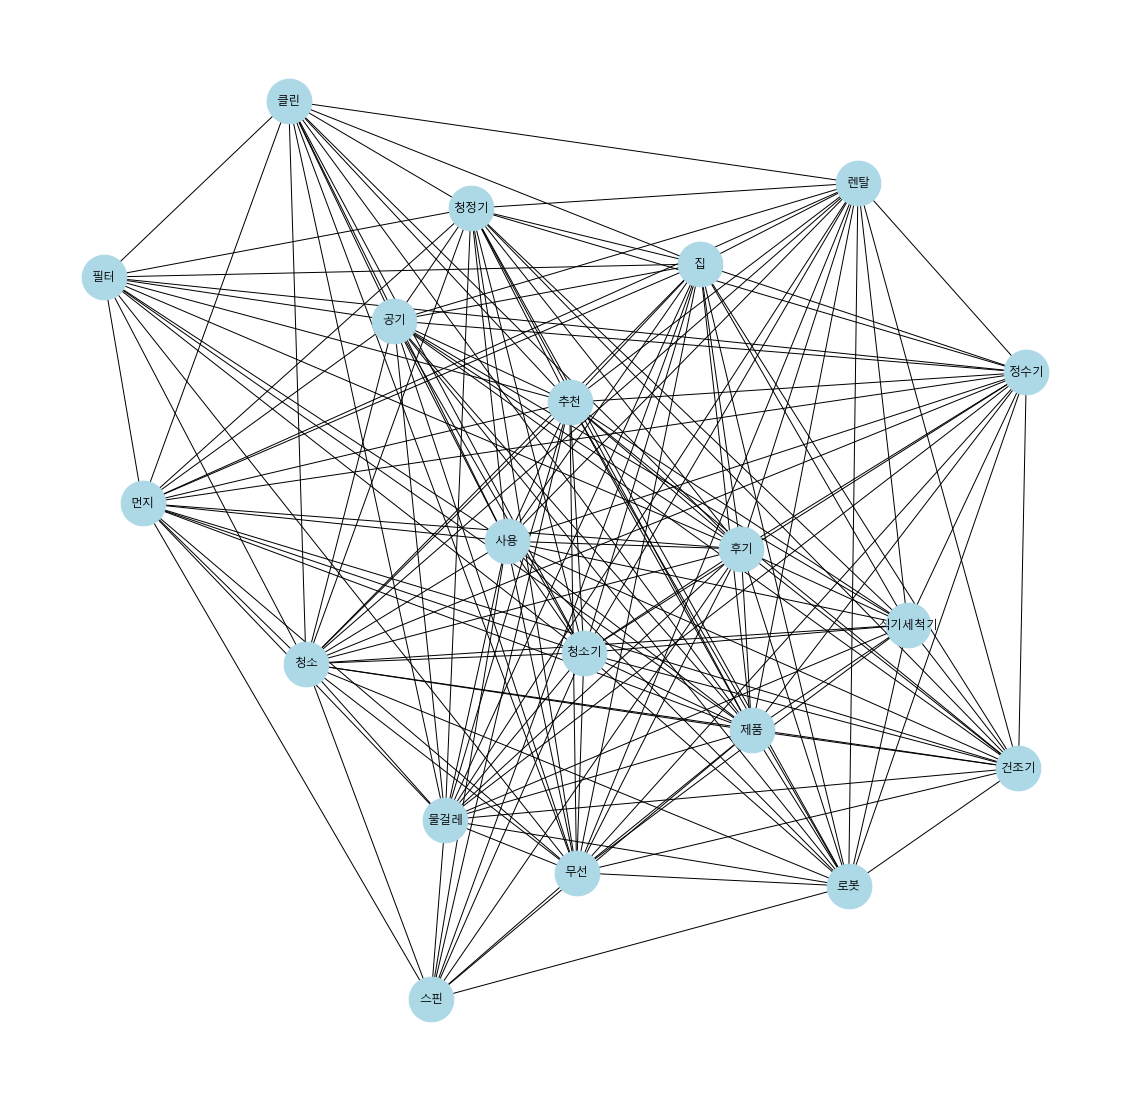

In [50]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_name = 'Malgun Gothic'
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'arrowsize' : 2
}
nx.draw(tm_network, labels=tm_id2word, font_family=font_name, ax=ax, **option)

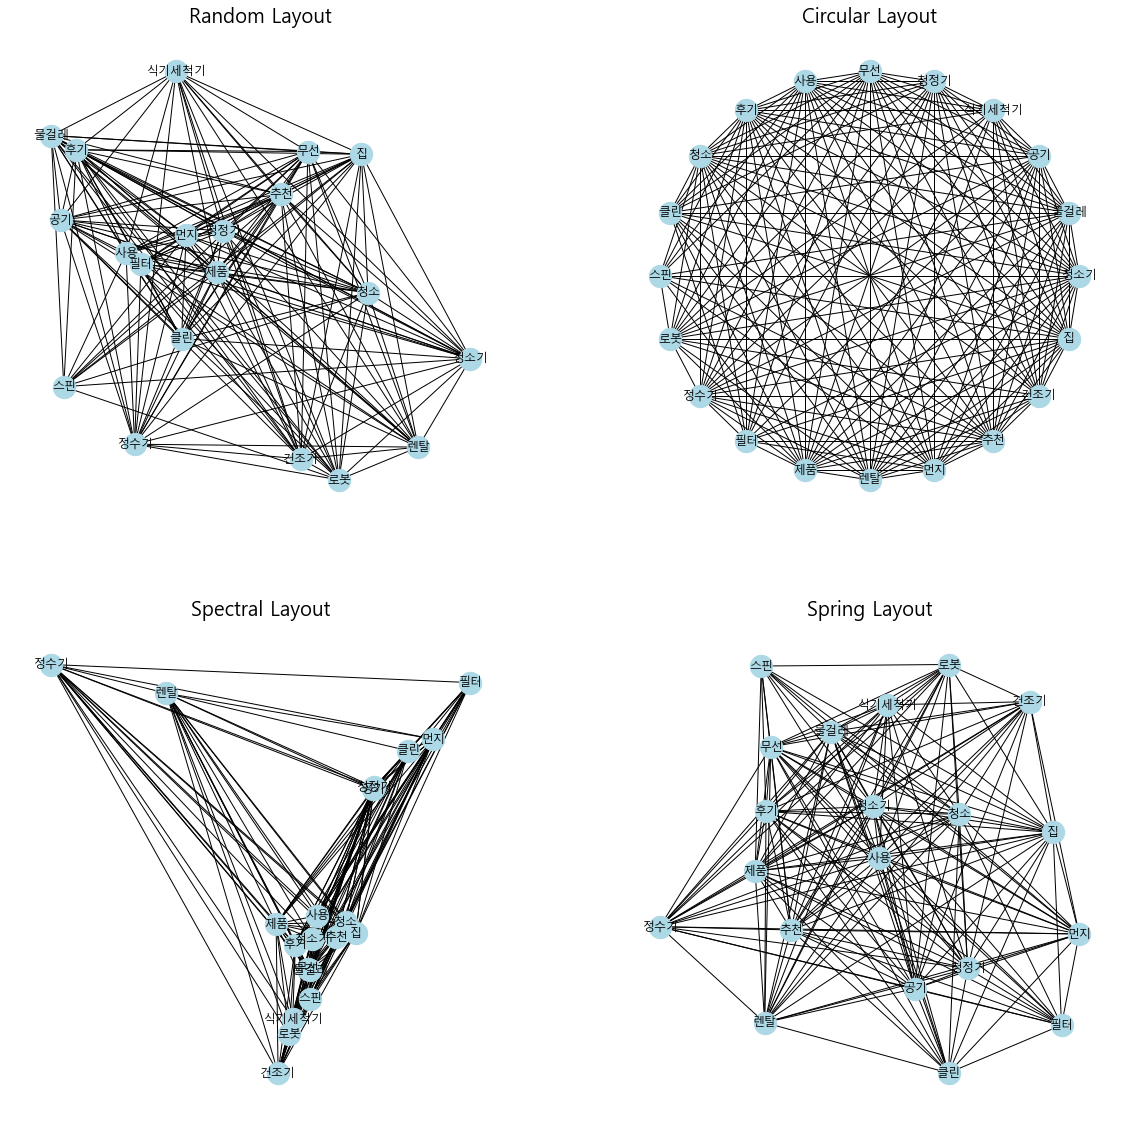

In [51]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 500,
    'arrowsize' : 100
}

plt.subplot(221)
plt.title('Random Layout', fontsize=20)
nx.draw_random(tm_network, labels=tm_id2word, font_family=font_name, **option)
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(tm_network, labels=tm_id2word, font_family=font_name, **option)
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(tm_network, labels=tm_id2word, font_family=font_name, **option)
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(tm_network, labels=tm_id2word, font_family=font_name, **option)

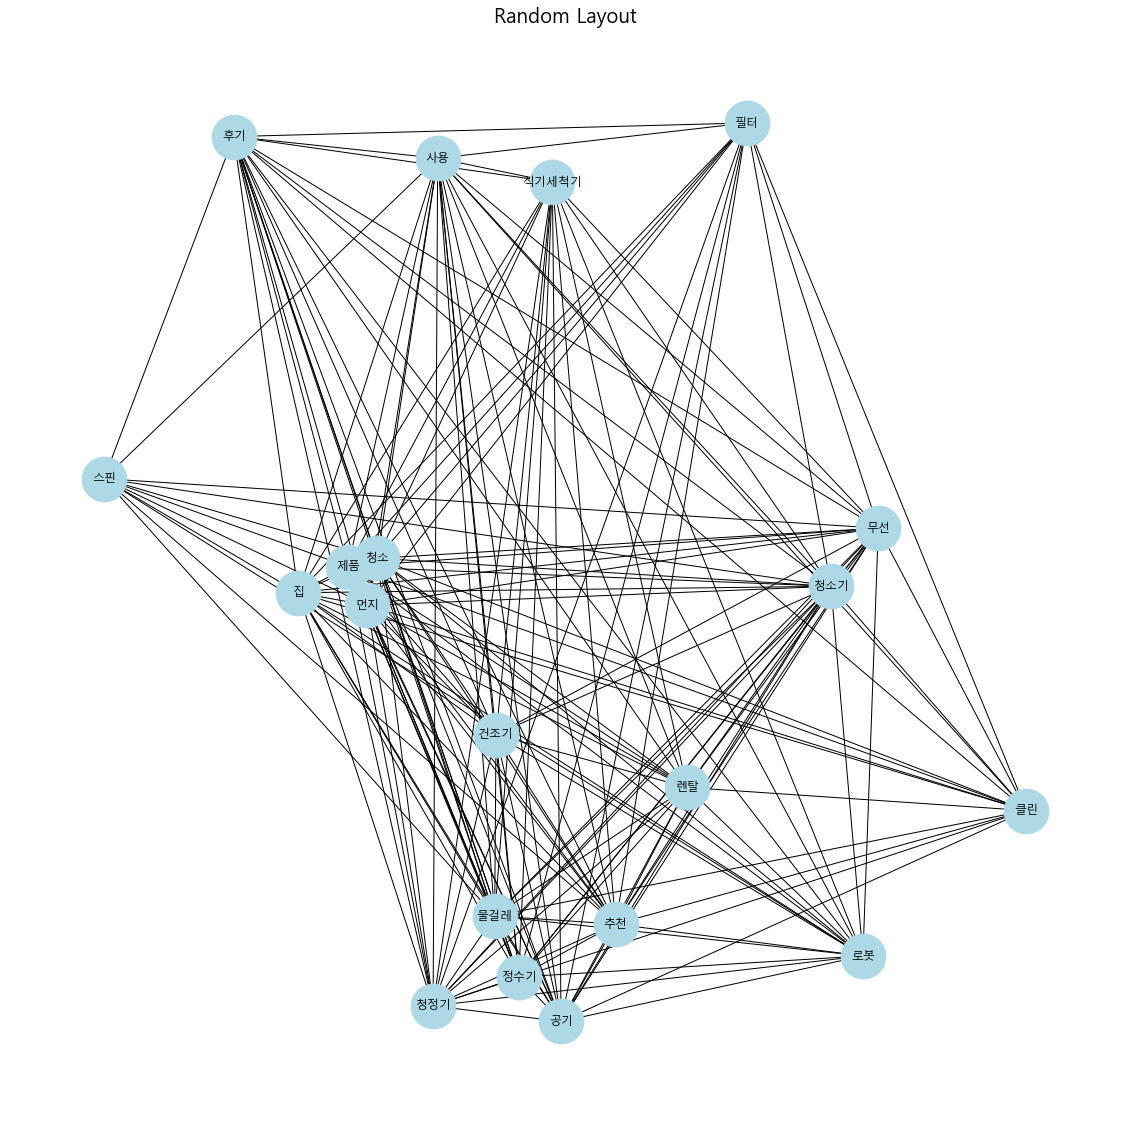

In [52]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'arrowsize' : 100
}

plt.subplot(111)
plt.title('Random Layout', fontsize=20)
nx.draw_random(tm_network, labels=tm_id2word, font_family=font_name, **option)

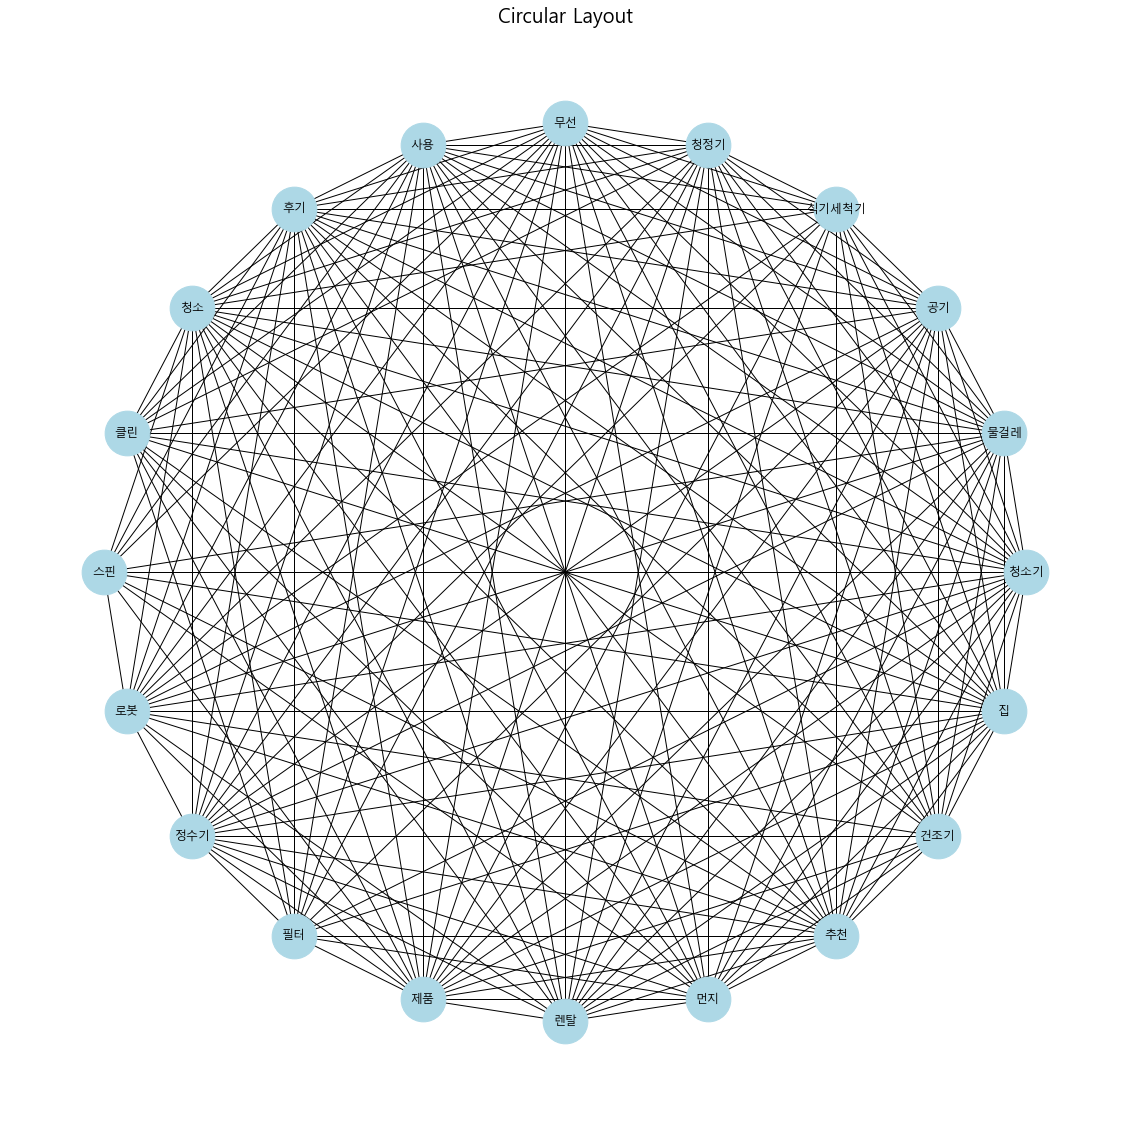

In [53]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'arrowsize' : 100
}

plt.subplot(111)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(tm_network, labels=tm_id2word, font_family=font_name, **option)

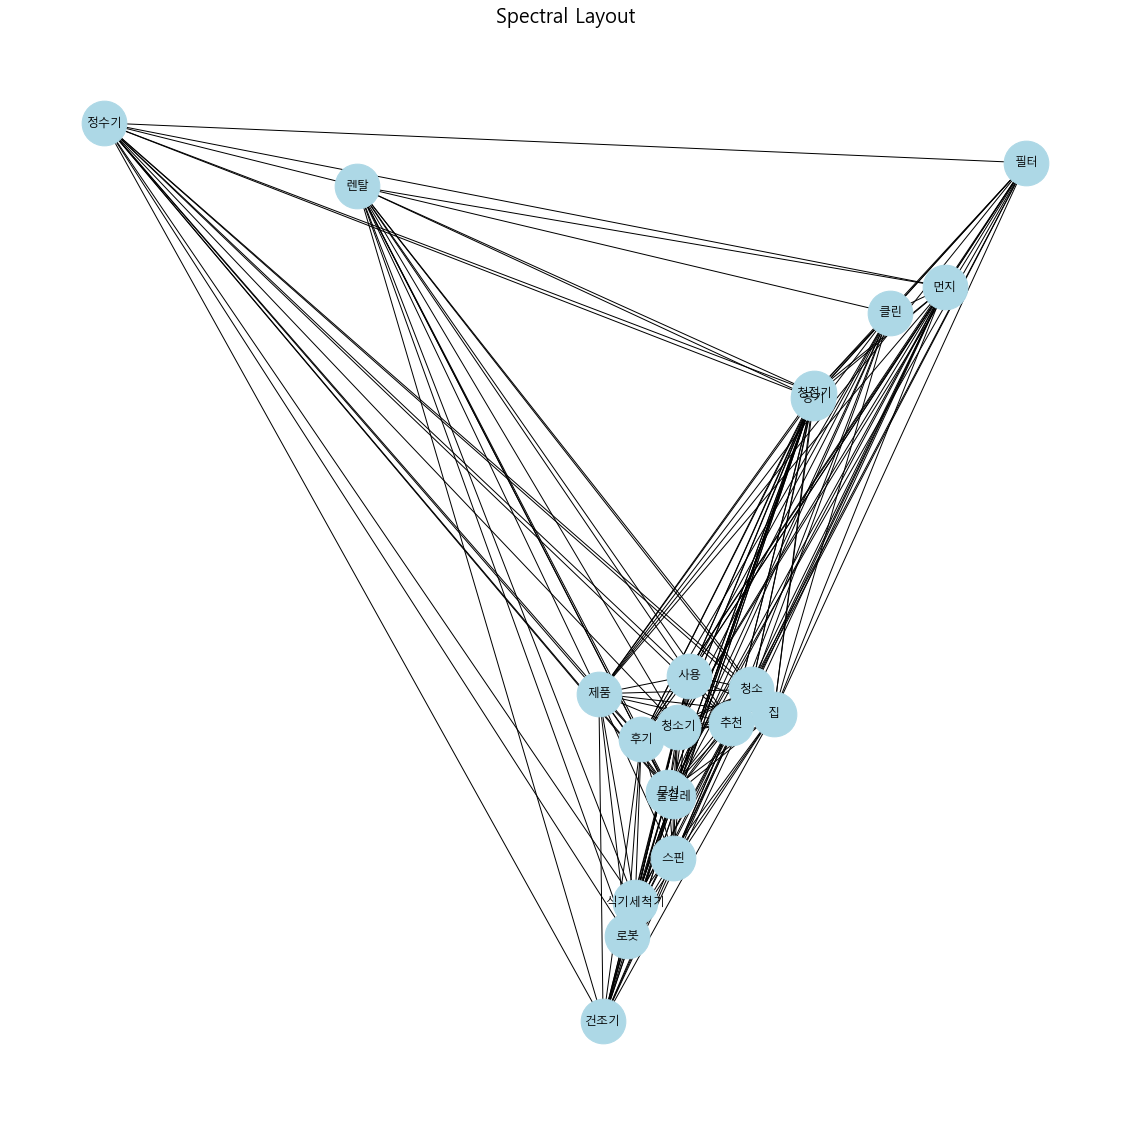

In [54]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'arrowsize' : 100
}

plt.subplot(111)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(tm_network, labels=tm_id2word, font_family=font_name, **option)

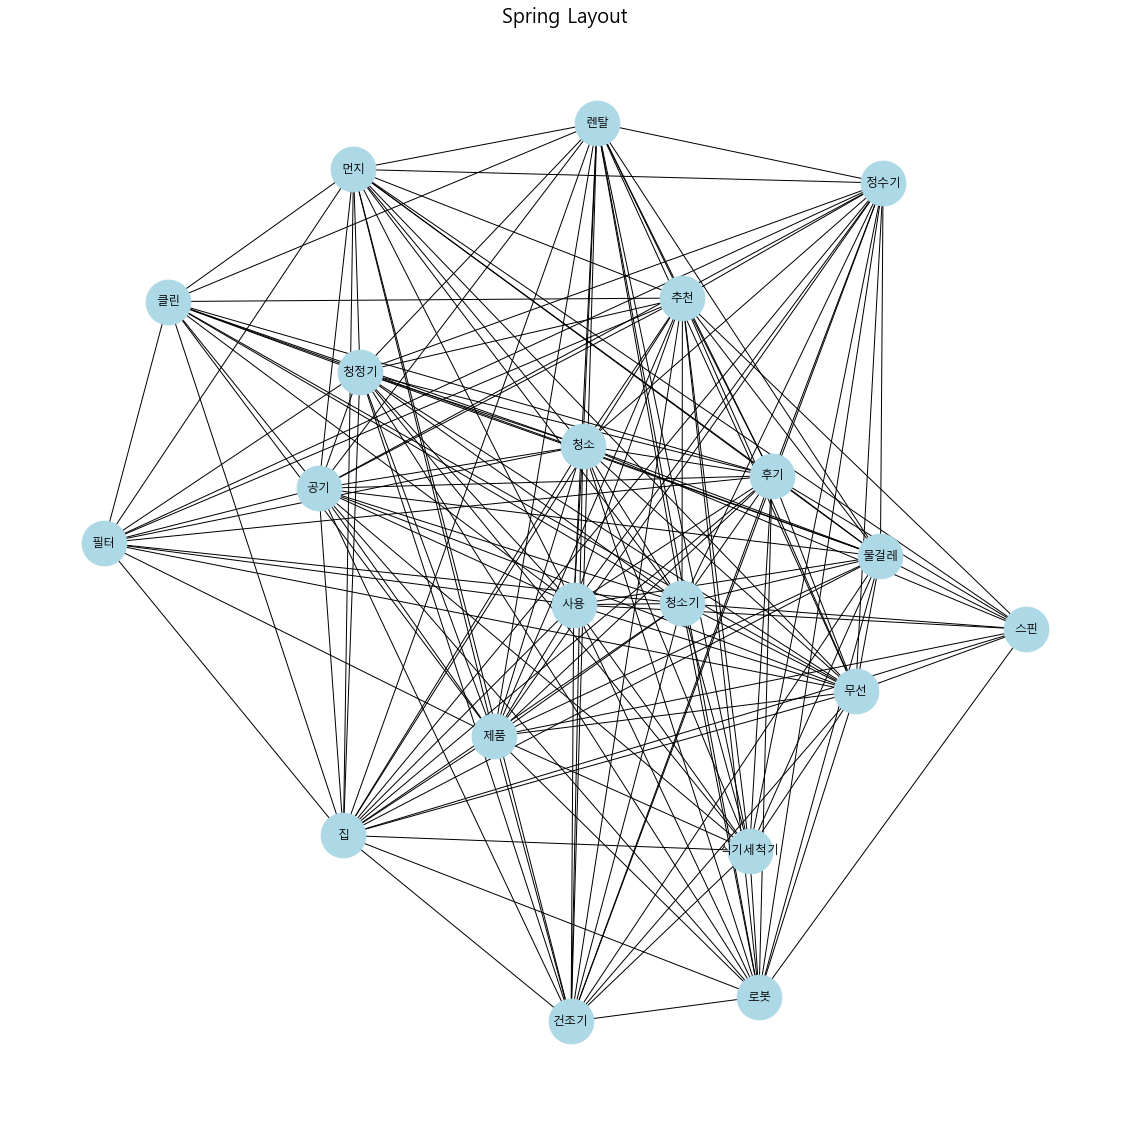

In [55]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'arrowsize' : 100
}

plt.subplot(111)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(tm_network, labels=tm_id2word, font_family=font_name, **option)

### 중심성 지수 구하기

In [56]:
#Degree 연결중심성
nx.degree_centrality(tm_network)

{0: 1.0,
 1: 0.9473684210526315,
 2: 0.9473684210526315,
 3: 0.7894736842105263,
 4: 0.9473684210526315,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 0.7368421052631579,
 10: 0.5789473684210527,
 11: 0.8421052631578947,
 12: 0.894736842105263,
 13: 0.6842105263157894,
 14: 1.0,
 15: 0.894736842105263,
 16: 0.894736842105263,
 17: 1.0,
 18: 0.8421052631578947,
 19: 1.0}

In [57]:
def f2(x):
    return x[1]

res = sorted(nx.degree_centrality(tm_network).items(), key=f2, reverse=True) # 내림차순 정렬
for i in range(len(res)):
    print(res[i])

(0, 1.0)
(5, 1.0)
(6, 1.0)
(7, 1.0)
(8, 1.0)
(14, 1.0)
(17, 1.0)
(19, 1.0)
(1, 0.9473684210526315)
(2, 0.9473684210526315)
(4, 0.9473684210526315)
(12, 0.894736842105263)
(15, 0.894736842105263)
(16, 0.894736842105263)
(11, 0.8421052631578947)
(18, 0.8421052631578947)
(3, 0.7894736842105263)
(9, 0.7368421052631579)
(13, 0.6842105263157894)
(10, 0.5789473684210527)


In [58]:
#Current Flow Betweenness, 매개중심성
nx.current_flow_betweenness_centrality(tm_network)

{0: 0.0649217095736981,
 1: 0.061571837901333755,
 2: 0.06002080800657,
 3: 0.05088565801133434,
 4: 0.06002080800657015,
 5: 0.06492170957369815,
 6: 0.06492170957369815,
 7: 0.06492170957369803,
 8: 0.06492170957369799,
 9: 0.05040003216552866,
 10: 0.041778116800573604,
 11: 0.05648788198113355,
 12: 0.057059032587558456,
 13: 0.04780140842340397,
 14: 0.06492170957369803,
 15: 0.05638404061316378,
 16: 0.060791462334546006,
 17: 0.06492170957369807,
 18: 0.05315592447947802,
 19: 0.06492170957369797}

In [59]:
def f2(x):
    return x[1]

res = sorted(nx.current_flow_betweenness_centrality(tm_network).items(), key=f2, reverse=True)
#print(res)
for i in range(len(res)):
    print(res[i])

(5, 0.06492170957369815)
(6, 0.06492170957369815)
(0, 0.0649217095736981)
(17, 0.06492170957369807)
(7, 0.06492170957369803)
(14, 0.06492170957369803)
(8, 0.06492170957369799)
(19, 0.06492170957369797)
(1, 0.061571837901333755)
(16, 0.060791462334546006)
(4, 0.06002080800657015)
(2, 0.06002080800657)
(12, 0.057059032587558456)
(11, 0.05648788198113355)
(15, 0.05638404061316378)
(18, 0.05315592447947802)
(3, 0.05088565801133434)
(9, 0.05040003216552866)
(13, 0.04780140842340397)
(10, 0.041778116800573604)


In [60]:
#Closeness, 근접중심성
nx.closeness_centrality(tm_network, distance='weight')

{0: 0.051771117166212535,
 1: 0.24050632911392406,
 2: 0.20212765957446807,
 3: 0.17117117117117117,
 4: 0.20430107526881722,
 5: 0.24358974358974358,
 6: 0.08085106382978724,
 7: 0.15079365079365079,
 8: 0.18811881188118812,
 9: 0.24050632911392406,
 10: 0.2159090909090909,
 11: 0.19387755102040816,
 12: 0.22093023255813954,
 13: 0.25333333333333335,
 14: 0.18811881188118812,
 15: 0.24050632911392406,
 16: 0.24675324675324675,
 17: 0.2602739726027397,
 18: 0.21348314606741572,
 19: 0.21348314606741572}

In [61]:
res = sorted(nx.closeness_centrality(tm_network, distance='weight').items(), key=f2, reverse=True)
for i in range(len(res)):
    print(res[i])

(17, 0.2602739726027397)
(13, 0.25333333333333335)
(16, 0.24675324675324675)
(5, 0.24358974358974358)
(1, 0.24050632911392406)
(9, 0.24050632911392406)
(15, 0.24050632911392406)
(12, 0.22093023255813954)
(10, 0.2159090909090909)
(18, 0.21348314606741572)
(19, 0.21348314606741572)
(4, 0.20430107526881722)
(2, 0.20212765957446807)
(11, 0.19387755102040816)
(8, 0.18811881188118812)
(14, 0.18811881188118812)
(3, 0.17117117117117117)
(7, 0.15079365079365079)
(6, 0.08085106382978724)
(0, 0.051771117166212535)


In [62]:
#Eigenvector, 위세중심성
nx.eigenvector_centrality(tm_network, weight='weight')

{0: 0.5597624857275705,
 1: 0.3900750294878178,
 2: 0.1946287649175207,
 3: 0.17482824300919303,
 4: 0.19006494774689917,
 5: 0.35128023718237683,
 6: 0.23535782526226945,
 7: 0.18526059060660763,
 8: 0.17600576034962223,
 9: 0.11196861407515872,
 10: 0.24707013855988735,
 11: 0.18591721342789133,
 12: 0.06829616614125472,
 13: 0.08255365485205098,
 14: 0.11936675124591851,
 15: 0.07515330091176801,
 16: 0.09480883677599525,
 17: 0.1145153411715547,
 18: 0.12058212918197915,
 19: 0.09840007993239645}

In [63]:
def f2(x):    # 함수정의 생략가능
    return x[1]

res = sorted(nx.eigenvector_centrality(tm_network, weight='weight').items(), key=f2, reverse=True)  # 내림차순 정렬
for i in range(len(res)):
    print(res[i])

(0, 0.5597624857275705)
(1, 0.3900750294878178)
(5, 0.35128023718237683)
(10, 0.24707013855988735)
(6, 0.23535782526226945)
(2, 0.1946287649175207)
(4, 0.19006494774689917)
(11, 0.18591721342789133)
(7, 0.18526059060660763)
(8, 0.17600576034962223)
(3, 0.17482824300919303)
(18, 0.12058212918197915)
(14, 0.11936675124591851)
(17, 0.1145153411715547)
(9, 0.11196861407515872)
(19, 0.09840007993239645)
(16, 0.09480883677599525)
(13, 0.08255365485205098)
(15, 0.07515330091176801)
(12, 0.06829616614125472)


# B. 단어 임베딩(Word2Vec)
Word2Vec은 단어 임베딩(embedding)을 하는 방법으로 여기서는 skip-gram 모델을 이용해 단어를 벡터로 변환하고 TSNE 알고리즘으로 시각화 한다.

### Word2Vec 생성 및 시각화
Word2Vec을 생성하고 시각화하기 위해서는 gensim.models의 Word2Vec 라이브러리를 import한다. 그리고 시각화를 위해서 TSNE 라이브러리를 import한다.

In [46]:
!pip install gensim

You should consider upgrading via the 'C:\Users\realy\anaconda3\envs\py37\python.exe -m pip install --upgrade pip' command.


In [64]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

#tm_stop_words.extend(['아디','다스']) #불필요한 명사 불용어 사전에 추가하기

tm_nouns = []   # 명사 추출하기
nouns = []
for post in tm_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in tm_stop_words:
                nouns.append(noun)
        tm_nouns.append(nouns)
    else:
        tm_nouns.append(['nouns'])
        
tm_nouns[0:10]

[['차트',
  '뉴스',
  '매직',
  '식기세척기',
  '시장',
  '만년',
  '빨래',
  '건조기',
  '로봇',
  '청소기',
  '신',
  '물건',
  '가전',
  '신기',
  '매직',
  '절반',
  '이상',
  '점유',
  '차지',
  '자리',
  '확인',
  '매직',
  '동양',
  '매직',
  '매직',
  '이름',
  '슈퍼',
  '공기',
  '청정기',
  '동양',
  '매직',
  '매직',
  '이름',
  '슈퍼',
  '공기',
  '청정기',
  '렌탈',
  '사용',
  '저희',
  '침구',
  '청소기',
  '사용',
  '침구',
  '청소',
  '청소기',
  '먼지',
  '매직',
  '무선',
  '청소기',
  '봉기',
  '사용',
  '매직',
  '무선',
  '청소기',
  '지금',
  '유선',
  '청소기',
  '무선',
  '청소기',
  '구입',
  '성비',
  '구매',
  '무선',
  '청소기',
  '구입',
  '기념',
  '정성',
  '포스팅',
  '무선',
  '내',
  '돈',
  '유선',
  '진공청소기',
  '매직',
  '아기',
  '뒤',
  '내',
  '머리카락',
  '여념',
  '컨',
  '청소기',
  '검색',
  '돌입',
  '구입',
  '청소기',
  '소형',
  '청소기',
  '청소기',
  '사이',
  '킹',
  '유사',
  '소음',
  '흡입력',
  '자랑',
  '소형',
  '가전',
  '무선',
  '청소기',
  '매직',
  '청소기',
  '사용',
  '비교',
  '먼지',
  '핸드',
  '링',
  '구매',
  '건',
  '매직',
  '구',
  '매직',
  '무선',
  '청소기',
  '동급',
  '최강',
  '성능',
  '경험',
  '매직',
  '무선',
  '청소기',
  '동급',
  '최강',
  '성능',
  '경험

In [65]:
tm_word2vec = Word2Vec(tm_nouns, min_count=1)
tm_word2vec

생성된 데이터의 Word2Vec 모델에서 핵심어와 유사한 단어를 출력한다.

In [66]:
tm_word2vec.wv.most_similar("매직", topn=20)  # 불필요한 단어가 발견되면 불용어 리스트에 추가한 후 다시 실행한다

[('청소기', 0.6892738938331604),
 ('사용', 0.6792898178100586),
 ('후기', 0.5142009854316711),
 ('추천', 0.49143192172050476),
 ('제품', 0.4751737117767334),
 ('무선', 0.4300735890865326),
 ('청소', 0.4042189419269562),
 ('공기', 0.3447524607181549),
 ('식기세척기', 0.3436465263366699),
 ('집', 0.3382337987422943),
 ('로봇', 0.3276267349720001),
 ('선물', 0.32743850350379944),
 ('실사', 0.32508644461631775),
 ('물걸레', 0.3234262466430664),
 ('트러스트', 0.32091137766838074),
 ('구매', 0.31722867488861084),
 ('먼지', 0.30857163667678833),
 ('가격', 0.30794796347618103),
 ('청정기', 0.30734357237815857),
 ('렌탈', 0.2928747534751892)]

In [67]:
tm_stop_words.extend(['내', '뒤','울','량','용','모','전','도','명','봄','어디','나', '킹','식','살','브','년']) #불필요한 명사 불용어 사전에 추가하기

tm_nouns = []   # 명사 추출하기
nouns = []
for post in tm_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in tm_stop_words:
                nouns.append(noun)
        tm_nouns.append(nouns)
    else:
        tm_nouns.append(['nouns'])
        
tm_nouns[0:10]

[['차트',
  '뉴스',
  '매직',
  '식기세척기',
  '시장',
  '만년',
  '빨래',
  '건조기',
  '로봇',
  '청소기',
  '신',
  '물건',
  '가전',
  '신기',
  '매직',
  '절반',
  '이상',
  '점유',
  '차지',
  '자리',
  '확인',
  '매직',
  '동양',
  '매직',
  '매직',
  '이름',
  '슈퍼',
  '공기',
  '청정기',
  '동양',
  '매직',
  '매직',
  '이름',
  '슈퍼',
  '공기',
  '청정기',
  '렌탈',
  '사용',
  '저희',
  '침구',
  '청소기',
  '사용',
  '침구',
  '청소',
  '청소기',
  '먼지',
  '매직',
  '무선',
  '청소기',
  '봉기',
  '사용',
  '매직',
  '무선',
  '청소기',
  '지금',
  '유선',
  '청소기',
  '무선',
  '청소기',
  '구입',
  '성비',
  '구매',
  '무선',
  '청소기',
  '구입',
  '기념',
  '정성',
  '포스팅',
  '무선',
  '돈',
  '유선',
  '진공청소기',
  '매직',
  '아기',
  '머리카락',
  '여념',
  '컨',
  '청소기',
  '검색',
  '돌입',
  '구입',
  '청소기',
  '소형',
  '청소기',
  '청소기',
  '사이',
  '유사',
  '소음',
  '흡입력',
  '자랑',
  '소형',
  '가전',
  '무선',
  '청소기',
  '매직',
  '청소기',
  '사용',
  '비교',
  '먼지',
  '핸드',
  '링',
  '구매',
  '건',
  '매직',
  '구',
  '매직',
  '무선',
  '청소기',
  '동급',
  '최강',
  '성능',
  '경험',
  '매직',
  '무선',
  '청소기',
  '동급',
  '최강',
  '성능',
  '경험',
  '안녕',
  '품격',
  '블로그',


In [68]:
tm_word2vec = Word2Vec(tm_nouns, min_count=1)
tm_word2vec

In [69]:
tm_word2vec.wv.most_similar("청소기", topn=20)  # 불필요한 단어가 발견되면 불용어 리스트에 추가한 후 다시 실행한다

[('매직', 0.6957282423973083),
 ('무선', 0.652049720287323),
 ('사용', 0.5899101495742798),
 ('물걸레', 0.5833552479743958),
 ('후기', 0.48985743522644043),
 ('식기세척기', 0.4602062404155731),
 ('듀얼', 0.4498758912086487),
 ('청소', 0.43979528546333313),
 ('스핀', 0.41488778591156006),
 ('제품', 0.4058193266391754),
 ('추천', 0.3602937161922455),
 ('트러스트', 0.3563598692417145),
 ('집안일', 0.3294992446899414),
 ('인용', 0.31968408823013306),
 ('구매', 0.30030322074890137),
 ('남친', 0.2946242690086365),
 ('가전', 0.28867107629776),
 ('엄마', 0.2875711917877197),
 ('원형', 0.2862080931663513),
 ('손목', 0.27565816044807434)]

In [70]:
tm_word2vec.wv.most_similar("매직", topn=20)

[('청소기', 0.6957282423973083),
 ('사용', 0.6719744205474854),
 ('후기', 0.5146134495735168),
 ('추천', 0.5034247040748596),
 ('제품', 0.4860002100467682),
 ('무선', 0.4226754307746887),
 ('청소', 0.4056464731693268),
 ('청정기', 0.3664463460445404),
 ('식기세척기', 0.36568835377693176),
 ('가격', 0.3328242599964142),
 ('공기', 0.3272494673728943),
 ('트러스트', 0.3233189582824707),
 ('건조기', 0.32258450984954834),
 ('선물', 0.3178854286670685),
 ('물걸레', 0.3148844540119171),
 ('구매', 0.3051665425300598),
 ('집', 0.3041609525680542),
 ('실사', 0.291446328163147),
 ('말', 0.28869518637657166),
 ('로봇', 0.28723448514938354)]

In [71]:
tm_word2vec.wv.most_similar("물걸레", topn=20)

[('스핀', 0.733891487121582),
 ('무선', 0.7338024973869324),
 ('듀얼', 0.6241283416748047),
 ('청소기', 0.5833553075790405),
 ('남친', 0.3941369354724884),
 ('일회용', 0.3719737231731415),
 ('힘', 0.3713880181312561),
 ('손목', 0.34733694791793823),
 ('사용법', 0.33798956871032715),
 ('아범', 0.33475422859191895),
 ('중복', 0.3343963623046875),
 ('시댁', 0.33163535594940186),
 ('단점', 0.33138585090637207),
 ('영역', 0.3305577039718628),
 ('멀티', 0.3304973244667053),
 ('강의', 0.33005574345588684),
 ('충전', 0.32957687973976135),
 ('감각', 0.31835687160491943),
 ('효도', 0.3165037930011749),
 ('어머니', 0.31559300422668457)]

Word2Vec을 2차원으로 시각화를 위해서 n_components가 2인 TSNE를 생성한다.

In [72]:
tm_tsne = TSNE(n_components=2)
tm_tsne

TSNE()

Word2Vec으로 나온 어휘에서 유사도를 계산한다.

In [73]:
tm_vectors = tm_word2vec.wv
tm_vocab = tm_vectors.index_to_key
tm_similarity = [tm_vectors[v] for v in tm_vocab]

벡터의 유사도를 2차원으로 변환하여 DataFrame으로 살펴본다.

In [74]:
tm_transform_similarity = tm_tsne.fit_transform(tm_similarity)
tm_df = pd.DataFrame(tm_transform_similarity, index=tm_vocab, columns=['x', 'y'])
tm_df[0:10]

C:\Users\realy\anaconda3\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\realy\anaconda3\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


x          y
매직     -9.446717 -55.973141
청소기   -10.044440 -55.420292
물걸레   -12.864157 -53.031170
공기     61.739971   6.877532
식기세척기 -51.080681 -25.850956
청정기    61.715088   6.855388
무선    -12.423074 -53.390781
사용     -9.917566 -56.357937
후기     -9.371823 -54.861824
청소    -11.290697 -56.061050

Word2Vec 모델에 대해서 TSNE를 통해 2차원으로 시각화하여 나타낸다. annotate(word, pos)로 벡터 위치에 단어를 annotation 하는 형태로 만들고, matplotlib를 이용하여 시각화한다.

(-69.46458473205567, 71.11574592590333, -68.69360427856445, 70.00550918579101)

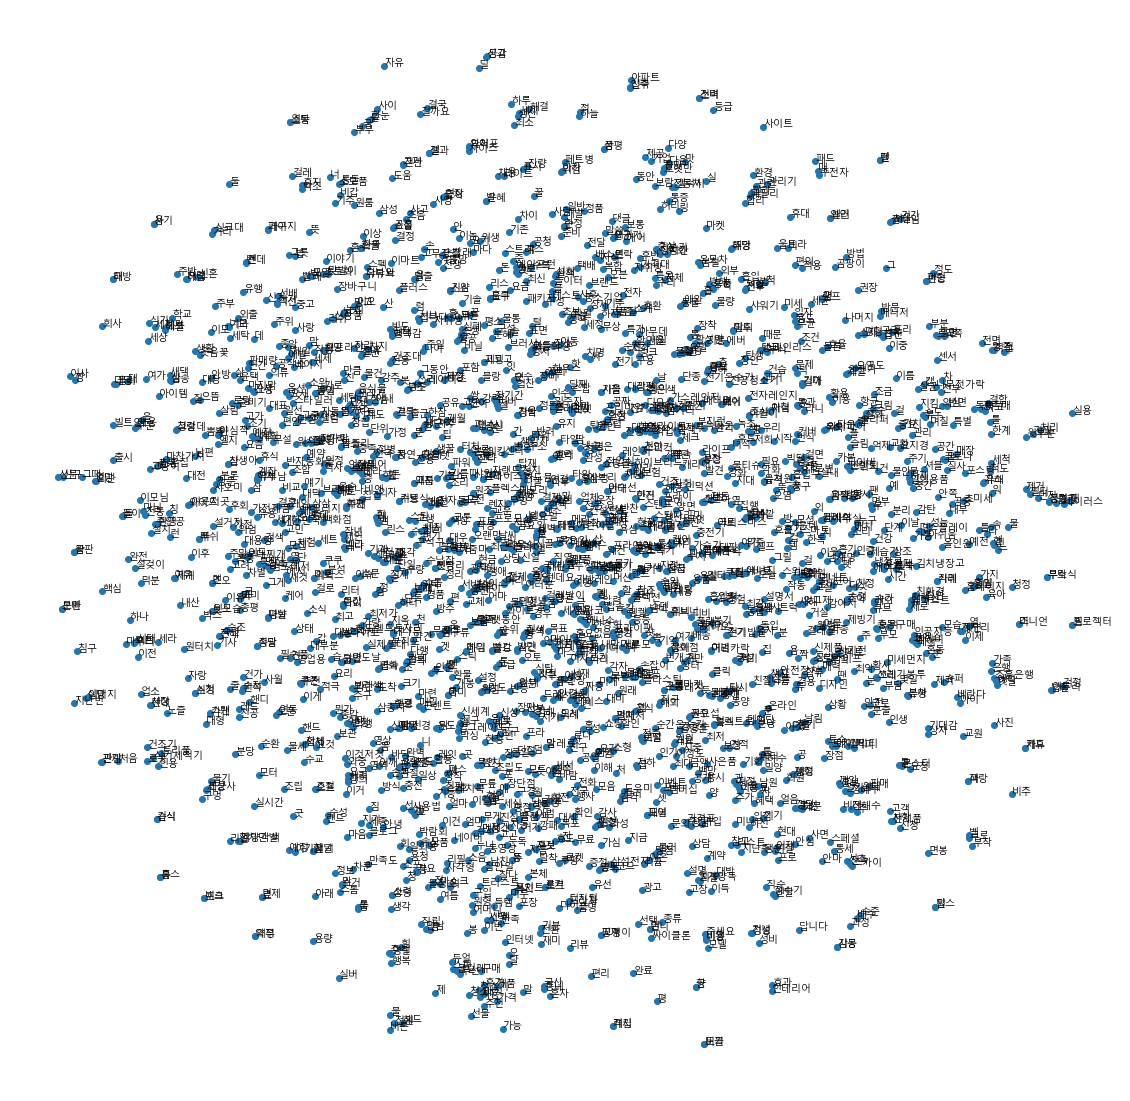

In [75]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_name = 'Malgun Gothic'
rc('font', family=font_name)

import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(20, 20)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(tm_df['x'], tm_df['y'])
for word, pos in tm_df.iterrows():
    ax.annotate(word, pos)
ax.axis("off")

# C. 군집 분석


### k-Means를 이용한 비계층적 군집분석
비계층적 군집화를 위해서 먼저 KMeans 라이브러리와 AgglomerativeClustering 라이브러리를 import한다. 그리고 군집화를 하기 전에 matplotlib를 이용하여 단어를 벡터로 변환하여 시각화한다.

In [76]:
tm_post_nouns = []   # 문서별로 명사 추출하기
for post in tm_posts:
    if type(post) == str:
        post_nouns = tagger.nouns(post)
        for i in range(len(post_nouns)-1, 0, -1):
            if post_nouns[i] in tm_stop_words:
                del post_nouns[i]
        tm_post_nouns.append(post_nouns)
          
tm_post_nouns[0:5]

[['차트',
  '뉴스',
  '매직',
  '식기세척기',
  '시장',
  '만년',
  '빨래',
  '건조기',
  '로봇',
  '청소기',
  '신',
  '물건',
  '가전',
  '신기',
  '매직',
  '절반',
  '이상',
  '점유',
  '차지',
  '자리',
  '확인',
  '매직'],
 ['동양',
  '매직',
  '매직',
  '이름',
  '슈퍼',
  '공기',
  '청정기',
  '동양',
  '매직',
  '매직',
  '이름',
  '슈퍼',
  '공기',
  '청정기',
  '렌탈',
  '사용',
  '저희',
  '침구',
  '청소기',
  '사용',
  '침구',
  '청소',
  '청소기',
  '먼지'],
 ['매직',
  '무선',
  '청소기',
  '봉기',
  '사용',
  '매직',
  '무선',
  '청소기',
  '지금',
  '유선',
  '청소기',
  '무선',
  '청소기',
  '구입',
  '성비',
  '구매',
  '무선',
  '청소기',
  '구입',
  '기념',
  '정성',
  '포스팅',
  '무선'],
 ['내',
  '돈',
  '유선',
  '진공청소기',
  '매직',
  '아기',
  '머리카락',
  '여념',
  '컨',
  '청소기',
  '검색',
  '돌입',
  '구입',
  '청소기',
  '소형',
  '청소기',
  '청소기',
  '사이',
  '유사',
  '소음',
  '흡입력',
  '자랑'],
 ['소형',
  '가전',
  '무선',
  '청소기',
  '매직',
  '청소기',
  '사용',
  '비교',
  '먼지',
  '핸드',
  '링',
  '구매',
  '건',
  '매직',
  '구']]

In [77]:
# 문서별로 추출한 명사들을 띄어쓰기를 붙여서 목록형(list)으로 만들기
for i in range(len(tm_post_nouns)):
    tm_post_nouns[i] = ' '.join(tm_post_nouns[i])

print(tm_post_nouns)

['차트 뉴스 매직 식기세척기 시장 만년 빨래 건조기 로봇 청소기 신 물건 가전 신기 매직 절반 이상 점유 차지 자리 확인 매직', '동양 매직 매직 이름 슈퍼 공기 청정기 동양 매직 매직 이름 슈퍼 공기 청정기 렌탈 사용 저희 침구 청소기 사용 침구 청소 청소기 먼지', '매직 무선 청소기 봉기 사용 매직 무선 청소기 지금 유선 청소기 무선 청소기 구입 성비 구매 무선 청소기 구입 기념 정성 포스팅 무선', '내 돈 유선 진공청소기 매직 아기 머리카락 여념 컨 청소기 검색 돌입 구입 청소기 소형 청소기 청소기 사이 유사 소음 흡입력 자랑', '소형 가전 무선 청소기 매직 청소기 사용 비교 먼지 핸드 링 구매 건 매직 구', '매직 무선 청소기 동급 최강 성능 경험 매직 무선 청소기 동급 최강 성능 경험 안녕 품격 블로그 주인장 김 대표 집안 환경 이방 방 콘센트', '매직 무선 청소기 동급 최강 인정 매직 무선 청소기 매일 청소 사 투 강아지 집 신경 마련 청소 고민 제', '대형 청소기 카본 히터 동양 매직 히터 매직 히터 매직 정수기 매직 비데 매직 청소기 동양 매직 청소기 건습 식청 소기 습식 청소기 대형 청소기 대용량 청소기 스탠 청소기 가게 청소기 사무실 청소기 동양 매직 매직 청소기 매직 대형 청소기', '동급 최강 매직 무선 청소기 동급 최강 매직 무선 청소기 오늘 무선 충전기 가격 성능 만족 청소기 매직 충전 무선 청소기 브랜드 무선 충전기 가격', '매직 무선 청소기 동급 최강 러쉬 매직 무선 청소기 동급 최강 러쉬 안녕 헬로 수경 아이 집 청소기 물걸레 청소 바닥 바닥 유지 시간 분', '매직 편리 무선 청소기 매직 무선 청소기 무선 청소기 적용 편의 가성 비 제품 사용 부분 하나 울트라 파워 러쉬 노즐', '동양 매직 청소기 사무실 청소기 매직 청소기 동양 매직 청소기 건습 식청 소기 습식 청소기 대형 청소기 대용량 청소기 스탠 청소기 가게 청소기 사무실 청소기 동양 매직 매직 청소기 매직 정품 무상 서비스 가능 매직', '무선 청소기 편

In [78]:
# 군집분석에 필요한 라이브러리 설치

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from matplotlib import font_manager as fm
from matplotlib import rc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [79]:
#===============K means 클러스터 분석========================
vec = CountVectorizer() # 단어빈도 기준으로 문서-단어 메트릭스DTM 생성
X = vec.fit_transform(tm_post_nouns)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.tail()

C:\Users\realy\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


가게  가격  가격대  가격표  가구  가능  가동  가량  가로  가루  ...  휴지  흡기  흡입  흡입구  흡입력  흡족  \
554   0   0    0    0   0   0   0   0   0   0  ...   0   0   0    0    0   0   
555   0   0    0    0   0   0   0   0   0   0  ...   0   0   1    0    0   0   
556   0   0    0    0   0   0   0   0   0   0  ...   0   0   0    0    0   0   
557   0   0    0    0   0   0   0   0   0   0  ...   0   0   1    0    0   0   
558   0   0    0    0   0   0   0   0   0   0  ...   0   0   0    0    0   0   

     희망  흰색  히든  히터  
554   0   0   0   0  
555   0   0   0   0  
556   0   0   0   0  
557   0   0   0   0  
558   0   0   0   0  

[5 rows x 1750 columns]

In [80]:
# 어휘빈도_문서역빈도(TF-IDF) 기준으로 문서-단어 메트릭스DTM 생성

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer() 
X = vec.fit_transform(tm_post_nouns)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df[10:20]

C:\Users\realy\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


가게   가격  가격대  가격표   가구        가능   가동   가량   가로   가루  ...   휴지   흡기  \
10  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
11  0.213852  0.0  0.0  0.0  0.0  0.117268  0.0  0.0  0.0  0.0  ...  0.0  0.0   
12  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
13  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
14  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
16  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
17  0.000000  0.0  0.0  0.0  0.0  0.134584  0.0  0.0  0.0  0.0  ...  0.0  0.0   
18  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
19  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   

     흡입  흡입구  흡입력   흡족   희망   흰색   히든   히터  
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 1750 columns]

클러스터의 개수 n_clusters가 3개인 KMeans 모델을 생성한다. 그리고 모델을 통해 나온 결과를 저장한다.

In [81]:
kmeans = KMeans(n_clusters=3).fit(df) # 군집수가 3인 비계층적 군집분석 시행
kmeans.labels_ # 각 문서가 어느 군집에 속하는지 표시

array([2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2,

C:\Users\realy\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\realy\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


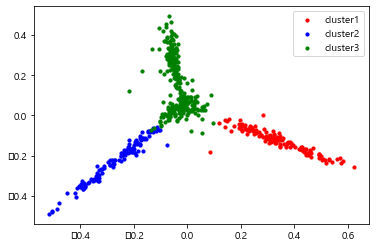

In [82]:
# 주성분분석(PCA)을 통해 데이터 분석결과를 2차원으로 변환하여 보여준다.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.index = tm_posts

kmeans.labels_ == 0

# x축 : first y출 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()

## 계층적 군집분석

### 와드에 의한 연결법

In [83]:
# 와드연결법으로 군집이 3개가 되도록 만들어 각 문서가 속한 군집을 배열형 데이터로 반환

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster.fit_predict(df)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0,

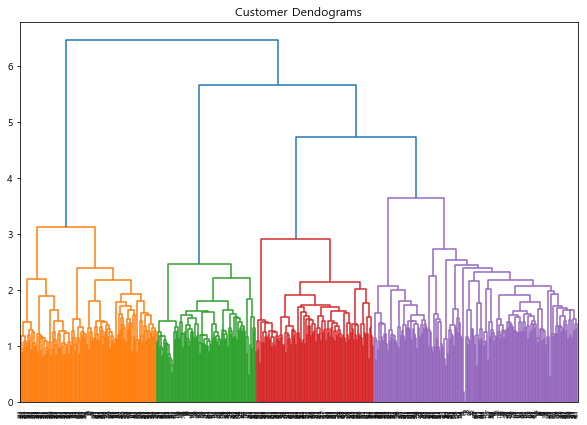

In [84]:
 # 와드연결법의 덴드로그램으로 시각화
    
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### 완전 연결법

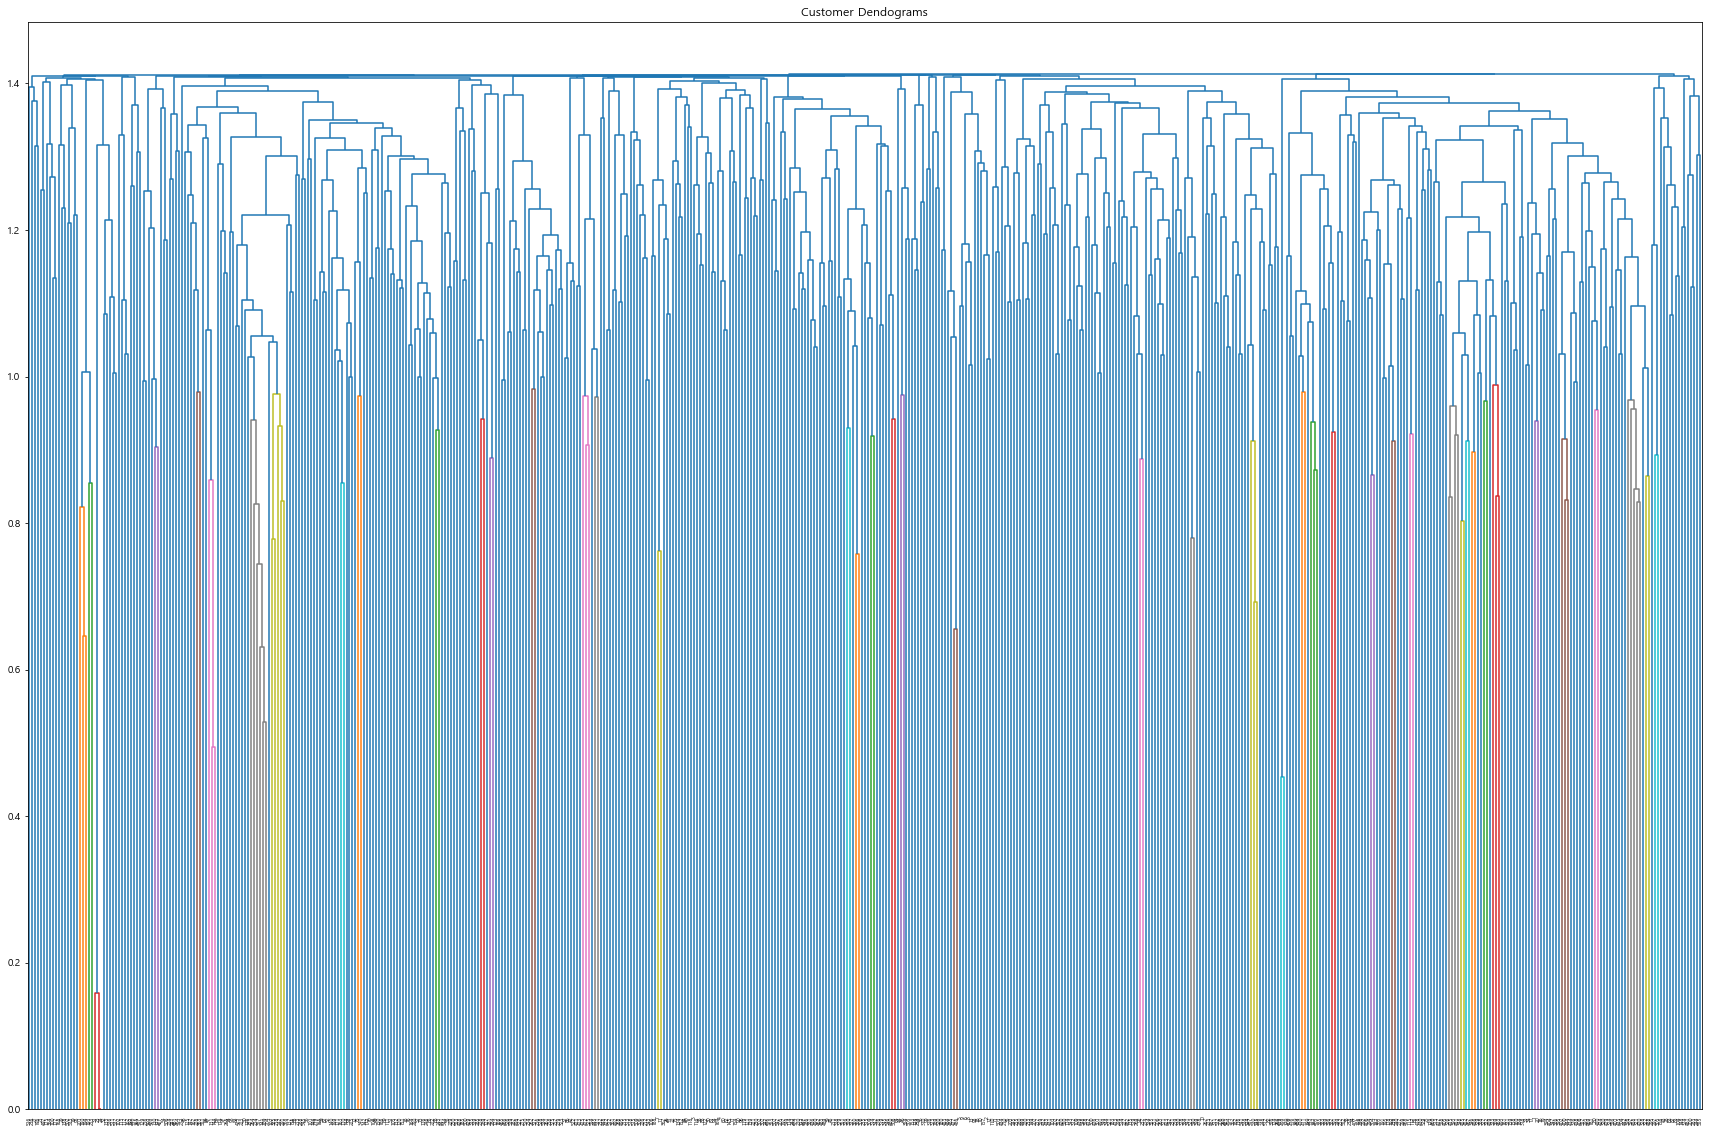

In [85]:
plt.figure(figsize=(30, 20))  # 완전연결법의 덴드로그램으로 시각화
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='complete'))

## 군집분석으로 나누어진 하위 집단에 대한 추가적인 분석

### 3개 하위군집으로 나누기

In [86]:
sub_gr = kmeans.labels_
sub_gr[100:120]

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2])

In [87]:
sub_1, sub_2, sub_3 = [], [], []

for i in range(len(sub_gr)):
    if sub_gr[i] == 0:
        sub_1.append(tm_post_nouns[i])
    elif sub_gr[i] == 1:
        sub_2.append(tm_post_nouns[i])
    else:
        sub_3.append(tm_post_nouns[i])
        
print(len(sub_1))
print(sub_1[0])
print()

print(len(sub_2))
print(sub_2[0])
print()

print(len(sub_3))
print(sub_3[0])
print()

127
동양 매직 매직 이름 슈퍼 공기 청정기 동양 매직 매직 이름 슈퍼 공기 청정기 렌탈 사용 저희 침구 청소기 사용 침구 청소 청소기 먼지

118
매직 무선 청소기 봉기 사용 매직 무선 청소기 지금 유선 청소기 무선 청소기 구입 성비 구매 무선 청소기 구입 기념 정성 포스팅 무선

314
차트 뉴스 매직 식기세척기 시장 만년 빨래 건조기 로봇 청소기 신 물건 가전 신기 매직 절반 이상 점유 차지 자리 확인 매직



In [88]:
def devide(sub_x):
    result = []
    for i in range(len(sub_x)):
        temp = sub_x[i].split(' ')
        for j in range(len(temp)):
            result.append(temp[j])
    return result

sub_1 = devide(sub_1)
sub_2 = devide(sub_2)
sub_3 = devide(sub_3)

### 군집1의 핵심어 빈도분석

In [89]:
from collections import Counter  # 상위 30개 명사 추출
num_top_nouns = 30
tm_nouns_counter = Counter(sub_1)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)
tm_top_nouns

tm_top_nouns = dict(tm_top_nouns)

In [90]:
from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_nouns)

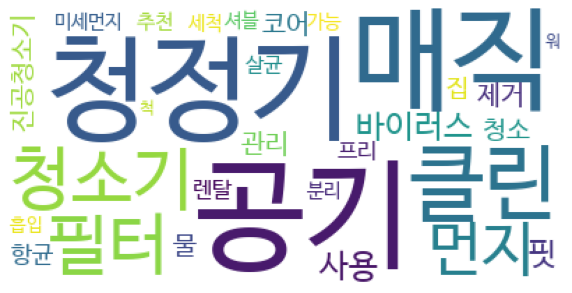

In [91]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

### 군집2의 핵심어 빈도분석

In [92]:
from collections import Counter  # 상위 30개 명사 추출
num_top_nouns = 30
tm_nouns_counter = Counter(sub_2)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)
tm_top_nouns

tm_top_nouns = dict(tm_top_nouns)

In [93]:
from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_nouns)

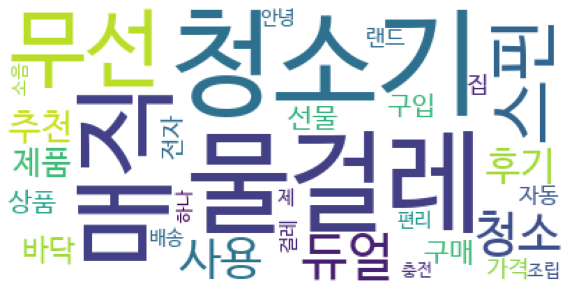

In [94]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

### 군집3의 핵심어 빈도분석

In [95]:
from collections import Counter  # 상위 30개 명사 추출
num_top_nouns = 30
tm_nouns_counter = Counter(sub_3)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)
tm_top_nouns

tm_top_nouns = dict(tm_top_nouns)

In [96]:
from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_nouns)

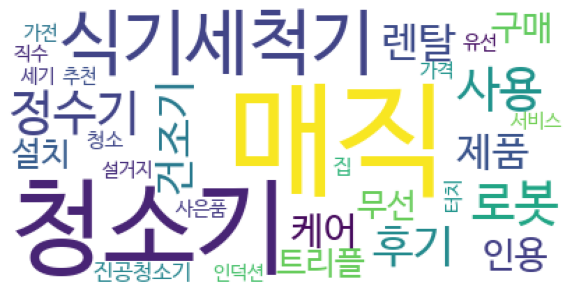

In [97]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)